In [1]:
# import required package for data handling and analyzation
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
from scipy import stats
import matplotlib as plt
import seaborn as sns
#import pandas_profiling
#import plotly.plotly as py
#import cufflinks
#cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)

# Tao Pipeline Instructions 

 ### Front-End (does not change)

 1. Describe the data
    - stats
    - charts
    - skew functions
 2. Missing (Separate the data set beween continuous and categorical)
    - Mean 
    - Median
    - Possible mean of SIC code cluster
    - Mode not applicable since most of the columns used are continuous
 3. Calculated Fields
    - create and calcualte the calcualted fields
 4. Run evaluation code as a baseline for the remaining items in the pipeline

 ### Middle of the Pipeline (This is where we have flexability in terms of order

   - Normalization ( depends on type of Skewness)
   - Std Dev - Outlier detection (NEEDS NORMALIZATION FIRST)
   - Stanardize - z-score (NEEDS NORMALIZATION FIRST)
   - IQR Outlier detection (NORMALIZATION NOT NEEDED FIRST)
   - Min - Max Standardization (NORMALIZATION NOT NEEDED FIRST)

 ### Back-End (does not change)

 1. Correlation
   - Pearson
   - Kendall
   - Spearman
   
 2. Binning 

 3. Feature Selection

 4. Run Evaluation Code

In [2]:
#initial importing of the raw data to be cleaned
# add code to remove the -1 and the error SIC numbers
df = pd.read_excel('Competition1_raw_data.xlsx',na_values=r'-')

In [3]:
#taking a look at the data to see if there are any visible errors
#10 shows "-" as blank values
df.head(15)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [4]:
df.info() # getting more info on the data
#df.describe() #not needed at the moment because all types are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [5]:
# Describe the Data - Exploratory Data Analysis
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


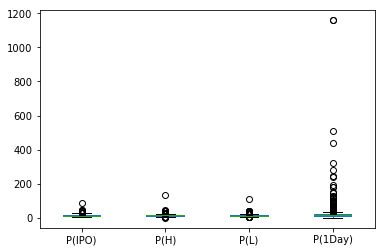

In [6]:
# Add Box Plots to further Describe the Data - for the Ps
df_p=df.iloc[:,3:7]
df_p.plot.box()

In [7]:
#Interpretation of above: All P variables are positively skewed, particularly P(1Day).

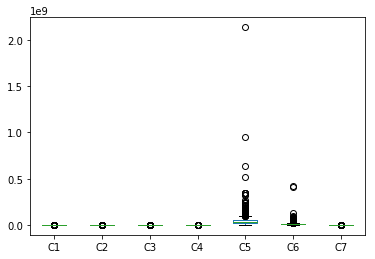

In [8]:
# Add Box Plots to further Describe the Data - for the Cs
df_p2=df.iloc[:,7:14]
df_p2.plot.box()

In [9]:
#Interpretation of above: All C variables are positively skewed, particularly C5.

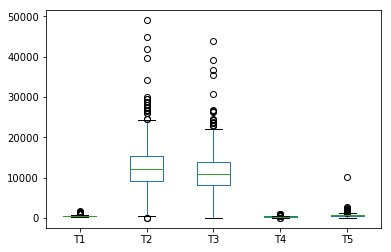

In [10]:
# Add Box Plots to further Describe the Data - for the Ts
df_p3=df.iloc[:,14:19]
df_p3.plot.box()

In [11]:
#Interpretation of above: All T variables are positively skewed, particularly T2 & T3.

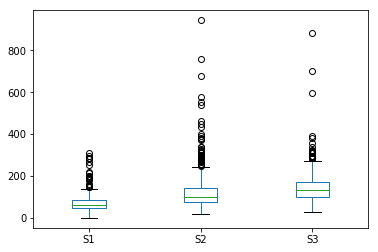

In [12]:
# Add Box Plots to further Describe the Data - for the Ss
df_p4=df.iloc[:,19:22]
df_p4.plot.box()

In [13]:
#Interpretation of above: All S variables are positively skewed.

In [14]:
df_copy = df.copy() # making a copy of the dataframe to preserve the original data

In [15]:
#Change the data types
df_copy.iloc[:,3:8].astype(float)
df_copy.iloc[:,9:].astype(float)
df_copy['C2'] = df_copy['C2'].astype('category')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


In [16]:
#Addressing negative ones found in the data
df_copy.iloc[[7,134],[18,19]]

,T5,S1
7,-1.0,55.0
134,643.0,-1.0


In [17]:
#Replace negative ones in the data with "Nan"
df_copy.iloc[7,18] = float('Nan')
df_copy.iloc[134,19] = float('Nan')
df_copy.iloc[[7,134],[18,19]]

,T5,S1
7,NaN,55.0
134,643.0,NaN


In [18]:
#Addressing the zeros found in columns T2 (Note: no zeros in T1)
df_copy.iloc[[125,199],[15]]

,T2
125,0.0
199,0.0


In [19]:
#Replace zeros in the data with "Nan"
df_copy.iloc[125,15] = float('Nan')
df_copy.iloc[199,15] = float('Nan')
df_copy.iloc[[125,199],[15]]

,T2
125,NaN
199,NaN


In [20]:
#Print list of entries with improper SIC codes
df_copy.iloc[[10,86,268,330,400,490,597,614,118,174,181,187,221,246,499,620],[0,1,2]]

,I1,I2,I3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN
86,BLT,BLOUNT INTERNATIONAL INC,NaN
268,GSL,GLOBAL SIGNAL INC,NaN
330,KFI,KKR Financial Holdings LLC,NaN
400,NAUH,"National American University Holdings, Inc.",NaN
490,RCH,"CHINA CGAME, INC.",NaN
597,TRMM,"Access to Money, Inc.",NaN
614,TZOO,TRAVELZOO INC,NaN
118,CERE,"Ceres, Inc.",100
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819"


In [21]:
#SIC 1191 should be 0191 and 1783 should be 0783 change later to deal with beginning zero.
#Also add code to bin the SIC code into text via dictionary (i.e., name of SIC Code category)
missing_I3 = ['8051','5122','6798','6199','8221','3200','6099','4724','5261','7812','1191','1783','7389','7389','3663','5065']

In [22]:
#Replace improper SIC codes with values ascertained via independent research
df_copy.iloc[[10,86,268,330,400,490,597,614,118,174,181,187,221,246,499,620],2] = missing_I3
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         679 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         680 non-null float64
S1         680 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


# Imputation Code

### Include a column to determine if the row needs imputing to keep track of changes by row


In [23]:
#df_mean = df_copy.fillna(df_copy.mean())
#df_median = df_copy.fillna(df_copy.median())
#df_mode = df_copy.fillna(df_copy.mode[0](dropna=True,numeric_only=True))

In [24]:
# df_median['C4'].head(25)

In [25]:
# Dawn's code
#Since none of the values are 100% normal, I think we should use the median value (vs. mean)
#when imputing missing values for continuous variables (i.e., all but C2);
#for the categorical variable (C2), we should use the mode.

#fist make a copy of the dataframe to preserve the original data
df_impute_copy = df_copy.copy()

#Start with C2 - by determining the mode
df_impute_copy['C2'].mode()

#Since none of the values are 100% normal, I think we should use the median value (vs. mean)
#when imputing missing values for continuous variables (i.e., all but C2);
#for the categorical variable (C2), we should use the mode.
# Include a column to determine if the row needs imputing to keep track of changes by row

#then impute median for P(IPO), P(H), P(L), P(1Day)
df_impute_copy['P(IPO)'].fillna(df_impute_copy['P(IPO)'].median(), inplace=True)
df_impute_copy['P(H)'].fillna(df_impute_copy['P(H)'].median(), inplace=True)
df_impute_copy['P(L)'].fillna(df_impute_copy['P(L)'].median(), inplace=True)
df_impute_copy['P(1Day)'].fillna(df_impute_copy['P(1Day)'].median(), inplace=True)

#now impute median for C1, C3, C4, C5, C6, C7
df_impute_copy['C1'].fillna(df_impute_copy['C1'].median(), inplace=True)
df_impute_copy['C3'].fillna(df_impute_copy['C3'].median(), inplace=True)
df_impute_copy['C4'].fillna(df_impute_copy['C4'].median(), inplace=True)
df_impute_copy['C5'].fillna(df_impute_copy['C5'].median(), inplace=True)
df_impute_copy['C6'].fillna(df_impute_copy['C6'].median(), inplace=True)
df_impute_copy['C7'].fillna(df_impute_copy['C7'].median(), inplace=True)

#now impute mode for C2...using the mode determined above (i.e., the series above with one number in it)
#df_impute_copy['C2'].fillna(1.0, inplace=True)
df_impute_copy['C2'].fillna(df_impute_copy['C2'].mode()[0],inplace=True)

#now impute median for T1, T2, T3, T4, T5
df_impute_copy['T1'].fillna(df_impute_copy['T1'].median(), inplace=True)
df_impute_copy['T2'].fillna(df_impute_copy['T2'].median(), inplace=True)
df_impute_copy['T3'].fillna(df_impute_copy['T3'].median(), inplace=True)
df_impute_copy['T4'].fillna(df_impute_copy['T4'].median(), inplace=True)
df_impute_copy['T5'].fillna(df_impute_copy['T5'].median(), inplace=True)

#now impute median for S1, S2, S3
df_impute_copy['S1'].fillna(df_impute_copy['S1'].median(), inplace=True)
df_impute_copy['S2'].fillna(df_impute_copy['S2'].median(), inplace=True)
df_impute_copy['S3'].fillna(df_impute_copy['S3'].median(), inplace=True)

#check work
df_impute_copy.head(15)

#Double-checking via "describe" - all imputation done except for C2
df_impute_copy.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000
mean,13.835191,15.474135,13.507493,25.577032,148.350440,1.695003,0.007342,4.916458e+07,1.237106e+07,458.587321,465.602639,12792.900293,11394.948680,294.331378,680.057185,68.498534,120.07478,144.743402
std,6.031536,6.604652,5.792972,72.068973,150.518513,158.309101,0.032777,1.039359e+08,2.502200e+07,1563.531760,175.614521,5401.665364,4836.172083,121.444797,471.856119,38.979729,84.77015,69.226629
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,0.000000,0.000000,167.000000,5.000000,20.00000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9213.250000,8168.000000,213.250000,463.250000,45.000000,73.00000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12049.000000,10785.000000,279.000000,624.500000,60.000000,100.00000,134.000000
75%,17.000000,17.000000,15.000000,20.087500,152.750000,0.440000,0.030941,4.936364e+07,1.193426e+07,289.758000,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.75000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.00000,883.000000


In [26]:
df_impute_copy.isnull().sum()

I1         0
I2         0
I3         0
P(IPO)     0
P(H)       0
P(L)       0
P(1Day)    0
C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
T1         0
T2         0
T3         0
T4         0
T5         0
S1         0
S2         0
S3         0
dtype: int64

In [27]:
#Add calculated fields

#Create P(mid) variable
df_impute_copy['P(mid)'] = (df_impute_copy['P(H)'] + df_impute_copy['P(L)']) / 2

#Create variable true_value for C6P
true_value = ((df_impute_copy['P(IPO)'] - df_impute_copy['P(mid)']) / df_impute_copy['P(mid)'])*100

# Add T1'=T4/T1 & S1'=S1/T2 Calcualte all the ratios for the Ts & S Colums
df_impute_copy['Long_to_Total_Sentences'] = df_impute_copy['T4'] / df_impute_copy['T1']
df_impute_copy['Pos_to_Total_Words'] = df_impute_copy['S1'] / df_impute_copy['T2']
df_impute_copy['Neg_to_Total_Words'] = df_impute_copy['S2'] / df_impute_copy['T2']
df_impute_copy['Pos_Neg_Words'] = df_impute_copy['S1'] / df_impute_copy['S2']
df_impute_copy['Long_to_Total_Words'] = df_impute_copy['T5'] / df_impute_copy['T2']
df_impute_copy['Real_to_Total_Words'] = df_impute_copy['T3'] / df_impute_copy['T2']

#Create new columns for "prime" variables
#Add them to df_impute_copy
df_impute_copy['C3P'] = np.where(df_impute_copy['C3'] > 0, '1', '0')
df_impute_copy['C5P'] = df_impute_copy['C5'] / df_impute_copy['C6']
df_impute_copy['C6P'] = np.where(df_impute_copy['P(IPO)'] > df_impute_copy['P(mid)'], true_value, '0')
df_impute_copy['Y1'] = np.where(df_impute_copy['P(IPO)'] < df_impute_copy['P(mid)'], '1', '0')
df_impute_copy['Y2'] = np.where(df_impute_copy['P(IPO)'] < df_impute_copy['P(1Day)'], '1', '0')



#if df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)']:
    #df_alt_copy['C6P'] = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100 
#else :
    #df_alt_copy['C6P'] = 0

df_impute_copy.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,Pos_to_Total_Words,Neg_to_Total_Words,Pos_Neg_Words,Long_to_Total_Words,Real_to_Total_Words,C3P,C5P,C6P,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.004875,0.009199,0.529915,0.054250,0.908876,1,3.864345,11.11111111111111,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.003258,0.011105,0.293388,0.051395,0.898724,0,12.028832,0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011593,0.006271,1.848485,0.061764,0.909350,0,3.369134,0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.009686,0.007144,1.355932,0.061630,0.917060,0,3.299697,0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.004518,0.010047,0.449664,0.048550,0.888469,1,3.726269,5.0,0,1


# Visualization of the data

In [28]:
# creating a list of the continuous columns that may need to be normalized.
    # This excludes C2, I1, I2, and I3...NEED TO EXCLUDE THE CATEGORICALS FROM HERE - AND DO SEPARATELY

col_list = df_impute_copy.columns.tolist()
del col_list[0:4]
del col_list[4]
col_list

# Create a list of columns to use in the evaluation code baseline
eval_list = df_impute_copy.columns.tolist()
del eval_list[0:7]
del eval_list[1]
del eval_list[6:14]
eval_list
col_list

['P(H)',
 'P(L)',
 'P(1Day)',
 'C1',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'S1',
 'S2',
 'S3',
 'P(mid)',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Pos_Neg_Words',
 'Long_to_Total_Words',
 'Real_to_Total_Words',
 'C3P',
 'C5P',
 'C6P',
 'Y1',
 'Y2']

In [29]:
df_continuous = df_impute_copy.loc[:,col_list]

In [30]:
# #NOTE: NEED TO REDO RANGE FOR ADDED COLUMNS
# p_df = df_continuous.iloc[:,:3].dropna()
# sns.pairplot(p_df, dropna =False)
# c_df = df_continuous.iloc[:,3:10].dropna()
# sns.pairplot(c_df, dropna =False)
# t_df = df_continuous.iloc[:,10:15].dropna()
# sns.pairplot(t_df, dropna =False)
# s_df = df_continuous.iloc[:,15:19].dropna()
# sns.pairplot(s_df, dropna =False)
# calc_df = df_continuous.iloc[:,19:25].dropna()
# sns.pairplot(calc_df, dropna =False)
# calc2_df = df_continuous.iloc[:,25:].dropna()
# sns.pairplot(calc2_df, dropna =False)


In [31]:
#Check skewness again
df_impute_copy.skew()

P(IPO)                      3.403623
P(H)                        9.285471
P(L)                        7.162031
P(1Day)                    12.522598
C1                          5.747573
C3                         21.158769
C4                         -0.491134
C5                         13.659056
C6                         12.613291
C7                         12.348960
T1                          1.740888
T2                          1.699807
T3                          1.617719
T4                          1.420602
T5                         12.829142
S1                          2.330122
S2                          3.737864
S3                          3.440281
P(mid)                      8.292727
Long_to_Total_Sentences     0.080198
Pos_to_Total_Words         20.997011
Neg_to_Total_Words         10.311764
Pos_Neg_Words               1.809010
Long_to_Total_Words        26.111496
Real_to_Total_Words        25.575293
C5P                        10.648354
dtype: float64

In [32]:
#Interpretation: All but C4 & Long_to_Total_Sentences are outside of the "acceptable" range of -1 to +1
#NEED TO DOUBLE-CHECK ON THIS INTERPRETATION (I.E., RANGE)

In [33]:
df_eval_base = df_impute_copy[eval_list]
df_eval_base.iloc[:,:].astype(float)

,C1,C3,C4,C5,C6,C7,P(mid),Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,Pos_Neg_Words,Long_to_Total_Words,Real_to_Total_Words,C3P,C5P,C6P,Y1,Y2
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,9.0,0.640426,0.004875,0.009199,0.529915,0.054250,0.908876,1.0,3.864345,11.111111,0.0,1.0
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,9.0,0.644753,0.003258,0.011105,0.293388,0.051395,0.898724,0.0,12.028832,0.000000,1.0,0.0
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,13.0,0.636816,0.011593,0.006271,1.848485,0.061764,0.909350,0.0,3.369134,0.000000,1.0,0.0
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,15.0,0.539634,0.009686,0.007144,1.355932,0.061630,0.917060,0.0,3.299697,0.000000,1.0,1.0
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,20.0,0.587413,0.004518,0.010047,0.449664,0.048550,0.888469,1.0,3.726269,5.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,317.0,-0.37,0.004670,38386565.0,9684109.0,186.101,15.0,0.612663,0.006512,0.007935,0.820755,0.050603,0.920952,0.0,3.963872,20.000000,0.0,1.0
678,98.0,-0.41,0.058689,32758082.0,7000000.0,25.461,15.0,0.647177,0.005069,0.009124,0.555556,0.056770,0.906227,0.0,4.679726,0.000000,1.0,1.0
679,112.0,0.60,0.030425,11479826.0,3125000.0,55.431,8.0,0.647761,0.004191,0.009044,0.463415,0.047976,0.889600,1.0,3.673544,0.000000,0.0,0.0
680,78.0,0.20,0.032284,13180261.0,3125000.0,117.857,16.0,0.710938,0.006773,0.005362,1.263158,0.043178,0.909412,1.0,4.217684,18.750000,0.0,0.0


In [34]:
df_eval_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 18 columns):
C1                         682 non-null float64
C3                         682 non-null float64
C4                         682 non-null float64
C5                         682 non-null float64
C6                         682 non-null float64
C7                         682 non-null float64
P(mid)                     682 non-null float64
Long_to_Total_Sentences    682 non-null float64
Pos_to_Total_Words         682 non-null float64
Neg_to_Total_Words         682 non-null float64
Pos_Neg_Words              682 non-null float64
Long_to_Total_Words        682 non-null float64
Real_to_Total_Words        682 non-null float64
C3P                        682 non-null object
C5P                        682 non-null float64
C6P                        682 non-null object
Y1                         682 non-null object
Y2                         682 non-null object
dtypes: float64(14), object(4)
memo

In [35]:
# create a subset of columns to normalize
norm_sublist = df_eval_base.columns.tolist()
del norm_sublist[-3:]
del norm_sublist[-2]
norm_sublist

['C1',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'P(mid)',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Pos_Neg_Words',
 'Long_to_Total_Words',
 'Real_to_Total_Words',
 'C5P']

In [36]:
norm_df = df_eval_base.loc[:,norm_sublist]

In [37]:
#RUN EVALUATION CODE AND THAT ENDS "BEGINNING OF THE PIPELINE"
#df_eval_base.to_csv("evalbase.csv", index=False)

In [38]:
for feature in norm_sublist:
    print (feature, "Shapiro test stat & p-value is",stats.shapiro(norm_df[feature]))
    print (feature, "skew is",norm_df[feature].skew())
    

C1 Shapiro test stat & p-value is (0.5307254791259766, 4.769476268757519e-39)
C1 skew is 5.747573481594514
C3 Shapiro test stat & p-value is (0.0666353702545166, 0.0)
C3 skew is 21.158768920966622
C4 Shapiro test stat & p-value is (0.984647810459137, 1.4011792472956586e-06)
C4 skew is -0.491134301597051
C5 Shapiro test stat & p-value is (0.269292414188385, 1.401298464324817e-45)
C5 skew is 13.659056034641408
C6 Shapiro test stat & p-value is (0.2611546516418457, 1.401298464324817e-45)
C6 skew is 12.613290510891558
C7 Shapiro test stat & p-value is (0.24965006113052368, 1.401298464324817e-45)
C7 skew is 12.348960384656746
P(mid) Shapiro test stat & p-value is (0.6110970973968506, 1.7249400258846322e-36)
P(mid) skew is 8.292726833436271
Long_to_Total_Sentences Shapiro test stat & p-value is (0.8640879392623901, 7.682332969547497e-24)
Long_to_Total_Sentences skew is 0.08019803376082925
Pos_to_Total_Words Shapiro test stat & p-value is (0.22569334506988525, 0.0)
Pos_to_Total_Words skew is 

# Normalization Code

In [39]:
n=682
for feature in norm_sublist:
    norm_name = feature + "_norm"
    if norm_df[feature].skew()>0.5:
        norm_df[norm_name] = np.power(norm_df[feature],1/n)
    elif norm_df[feature].skew()<-0.5:
        norm_df[norm_name] = np.power(norm_df[feature],2)
    else: norm_df[norm_name] = norm_df[feature]

In [40]:
normalized_df = norm_df.iloc[:,14:]
normalized_df.columns

Index(['C1_norm', 'C3_norm', 'C4_norm', 'C5_norm', 'C6_norm', 'C7_norm',
       'P(mid)_norm', 'Long_to_Total_Sentences_norm',
       'Pos_to_Total_Words_norm', 'Neg_to_Total_Words_norm',
       'Pos_Neg_Words_norm', 'Long_to_Total_Words_norm',
       'Real_to_Total_Words_norm', 'C5P_norm'],
      dtype='object')

In [41]:
for feature in normalized_df.columns.to_list():
    print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df[feature]))
    print (feature, "skew is",normalized_df[feature].skew())
    

C1_norm Shapiro test stat & p-value is (0.9275785684585571, 1.2795152315409128e-17)
C1_norm skew is 0.1534358352203254
C3_norm Shapiro test stat & p-value is (nan, 1.0)
C3_norm skew is -8.406310905810999
C4_norm Shapiro test stat & p-value is (0.984647810459137, 1.4011792472956586e-06)
C4_norm skew is -0.491134301597051
C5_norm Shapiro test stat & p-value is (0.9639634490013123, 6.702468875047218e-12)
C5_norm skew is 0.811729392611901
C6_norm Shapiro test stat & p-value is (0.953116238117218, 6.535283382166912e-14)
C6_norm skew is 0.6900427874454713
C7_norm Shapiro test stat & p-value is (0.9613010287284851, 1.9898620511743514e-12)
C7_norm skew is -0.6279193582374829
P(mid)_norm Shapiro test stat & p-value is (0.9401264786720276, 6.148575106427524e-16)
P(mid)_norm skew is -0.0523515842654062
Long_to_Total_Sentences_norm Shapiro test stat & p-value is (0.8640879392623901, 7.682332969547497e-24)
Long_to_Total_Sentences_norm skew is 0.08019803376082925
Pos_to_Total_Words_norm Shapiro test

In [42]:
normalized_df.describe()

,C1_norm,C3_norm,C4_norm,C5_norm,C6_norm,C7_norm,P(mid)_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Pos_Neg_Words_norm,Long_to_Total_Words_norm,Real_to_Total_Words_norm,C5P_norm
count,682.000000,366.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1.006997,0.984833,0.007342,1.025624,1.023624,1.006745,1.003844,0.628061,0.992285,0.993059,0.999221,0.995679,0.995446,1.001954
std,0.000974,0.116095,0.032777,0.001232,0.001164,0.002802,0.000487,0.083532,0.000509,0.000476,0.000620,0.000388,0.066216,0.000787
min,1.003382,0.000000,-0.162352,1.022421,1.019500,0.996190,1.001839,0.000000,0.990399,0.991036,0.997050,0.994947,0.000000,0.998152
25%,1.006535,0.997121,-0.013352,1.024859,1.022876,1.005478,1.003650,0.579954,0.991992,0.992757,0.998830,0.995540,0.999818,1.001539
50%,1.006875,0.998582,0.009125,1.025429,1.023463,1.006831,1.003877,0.629015,0.992280,0.993050,0.999211,0.995671,0.999841,1.001932
75%,1.007401,0.999796,0.030941,1.026315,1.024181,1.008347,1.004074,0.674852,0.992588,0.993346,0.999619,0.995794,0.999861,1.002322
max,1.011270,1.012184,0.092896,1.032002,1.029546,1.015264,1.007063,1.443089,0.996913,0.996493,1.001289,1.004365,1.004177,1.006772


In [43]:
# p_df = df_impute_copy.iloc[:,55:58]
# sns.pairplot(p_df, dropna =False)
# c_df = df_impute_copy.iloc[:,58:64]
# sns.pairplot(c_df, dropna =False,hue="C2")
# t_df = df_impute_copy.iloc[:,64:69]
# sns.pairplot(t_df, dropna =False)
# s_df = df_impute_copy.iloc[:,69:]
# sns.pairplot(s_df, dropna =False)

# Standardization Code for IQR - added by DWM 2/20/20

In [44]:
# # ONE METHOD
# def iqr(df, colname, bounds = [.25, .75]):
#     s = df[colname]
#     q = s.quantile(bounds)
#     return df[~s.clip(*q).isin(q)]

In [45]:
# SECOND METHOD
def mod_outlier(df):
        iqr_df = df.copy()

        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)

        for feature in df.columns:
            for i in range(0,len(df[feature])):
                if df[feature][i] < lower_bound[feature]:            
                    df[feature][i] = lower_bound[feature]

                if df[feature][i] > upper_bound[feature]:            
                    df[feature][i] = upper_bound[feature]    

        for feature in df.columns:
            iqr_df[feature] = df[feature]

        return(iqr_df)

In [46]:
# Kind of works I see Nans
mod_outlier(normalized_df)

,C1_norm,C3_norm,C4_norm,C5_norm,C6_norm,C7_norm,P(mid)_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Pos_Neg_Words_norm,Long_to_Total_Words_norm,Real_to_Total_Words_norm,C5P_norm
0,1.007069,1.001809,0.029074,1.026034,1.024003,1.005792,1.003227,0.640426,0.992224,0.993149,0.999069,0.995736,0.999860,1.001984
1,1.008181,NaN,-0.013352,1.025508,1.021775,1.004785,1.003227,0.644753,0.991638,0.993423,0.998204,0.995657,0.999843,1.003498
2,1.006620,NaN,0.020715,1.024698,1.022875,1.002935,1.003768,0.636816,0.993482,0.992591,1.000803,0.995926,0.999861,1.001783
3,1.007864,NaN,0.020023,1.024509,1.022717,1.003147,1.003979,0.539634,0.993224,0.992781,1.000447,0.995922,0.999873,1.001752
4,1.006446,0.996108,-0.034895,1.025603,1.023626,1.009501,1.004402,0.587413,0.992114,0.993277,0.998829,0.995574,0.999827,1.001931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.008480,NaN,0.004670,1.025937,1.023867,1.007693,1.003979,0.612663,0.992646,0.992933,0.999710,0.995635,0.999879,1.002021
678,1.006745,NaN,0.058689,1.025698,1.023380,1.004758,1.003979,0.647177,0.992281,0.993137,0.999139,0.995802,0.999856,1.002265
679,1.006943,0.999251,0.030425,1.024122,1.022170,1.005905,1.003054,0.647761,0.992005,0.993124,0.998873,0.995557,0.999828,1.001910
680,1.006409,0.997643,0.032284,1.024330,1.022170,1.007018,1.004074,0.710938,0.992703,0.992363,1.000343,0.995403,0.999861,1.002113


In [47]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 14 columns):
C1_norm                         682 non-null float64
C3_norm                         366 non-null float64
C4_norm                         682 non-null float64
C5_norm                         682 non-null float64
C6_norm                         682 non-null float64
C7_norm                         682 non-null float64
P(mid)_norm                     682 non-null float64
Long_to_Total_Sentences_norm    682 non-null float64
Pos_to_Total_Words_norm         682 non-null float64
Neg_to_Total_Words_norm         682 non-null float64
Pos_Neg_Words_norm              682 non-null float64
Long_to_Total_Words_norm        682 non-null float64
Real_to_Total_Words_norm        682 non-null float64
C5P_norm                        682 non-null float64
dtypes: float64(14)
memory usage: 74.7 KB


In [48]:
# Source for the IQR work is from the below url: 
#https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414

In [49]:
# Step 1 - Import necessary packages...not sure we need to do this - we probably already did
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def norm_df_outlier(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [51]:
normalized_col_list = normalized_df.columns.to_list()

In [52]:
normalized_df.apply(func=norm_df_outlier, axis=0)

C1_norm                            (1.0052372512045877, 1.0086990203451112)
C3_norm                                                          (nan, nan)
C4_norm                         (-0.07978998452796494, 0.09737892822443289)
C5_norm                            (1.0226750577222266, 1.0284988863914775)
C6_norm                            (1.0209196123986382, 1.0261371449054137)
C7_norm                            (1.0011750820974543, 1.0126501932715828)
P(mid)_norm                         (1.0030150285775503, 1.004708829609427)
Long_to_Total_Sentences_norm       (0.4376077722453211, 0.8171980525933258)
Pos_to_Total_Words_norm            (0.9910975422671495, 0.9934821064416439)
Neg_to_Total_Words_norm            (0.9918745027667675, 0.9942291298948662)
Pos_Neg_Words_norm                   (0.99764586898815, 1.0008030988107979)
Long_to_Total_Words_norm           (0.9951579925714189, 0.9961753949708612)
Real_to_Total_Words_norm           (0.9997540478870481, 0.9999256388549942)
C5P_norm    

In [53]:
normalized_df[(normalized_df[normalized_col_list] < lower_range) | (normalized_df[normalized_col_list] > upper_range)]

NameError: name 'lower_range' is not defined

In [54]:
# Step 2 - Write an outlier function that will return the lowerbound and upperbound values at 1.5*IQR
#norm_df_outlier = norm_df
def norm_df_outlier(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

#Get the lower-bound and upper-bound values
lower_range,upper_range = norm_df_outlier(norm_df[feature])

#Find columns considered outliers
norm_df[(norm_df[feature] < lower_range) | (norm_df[feature] > upper_range)]

,C1,C3,C4,C5,C6,C7,P(mid),Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,...,C6_norm,C7_norm,P(mid)_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Pos_Neg_Words_norm,Long_to_Total_Words_norm,Real_to_Total_Words_norm,C5P_norm
1,259.0,-1.620,-0.013352,28869196.0,2400000.0,25.936,9.000,0.644753,0.003258,0.011105,...,1.021775,1.004785,1.003227,0.644753,0.991638,0.993423,0.998204,0.995657,0.999843,1.003654
58,110.0,0.210,0.019300,79829804.0,800000.0,167.884,25.500,0.717949,0.004691,0.005940,...,1.020130,1.007540,1.004760,0.717949,0.992169,0.992512,0.999654,0.995443,0.999736,1.006772
78,371.0,-0.700,-0.016128,14447138.0,1100000.0,103.833,15.000,0.647059,0.004233,0.007789,...,1.020607,1.006831,1.003979,0.647059,0.992019,0.992906,0.999106,0.995417,0.999861,1.003783
96,182.0,-0.350,0.033823,9484296.0,9484296.0,64.482,9.000,0.770428,0.006518,0.005158,...,1.023836,1.006128,1.003227,0.770428,0.992647,0.992307,1.000343,0.995352,0.999716,1.000000
125,100.0,2.000,0.056995,31502000.0,30600000.0,1239.711,17.000,0.740854,0.006391,0.019006,...,1.025596,1.010498,1.004163,0.740854,0.992618,0.994206,0.998403,0.996542,1.000603,1.000043
148,11.0,0.240,0.049755,13500000.0,13500000.0,16.870,20.000,0.579336,0.003683,0.009775,...,1.024366,1.004152,1.004402,0.579336,0.991817,0.993237,0.998570,0.995733,0.999895,1.000000
161,85.0,-9.580,0.049464,125025500.0,1811313.0,8834.500,9.000,0.747951,0.007278,0.018358,...,1.021353,1.013412,1.003227,0.747951,0.992808,0.994155,0.998644,0.995511,0.999855,1.006228
169,69.0,-17.650,-0.082872,15028162.0,53061224.0,256.445,24.500,0.796850,0.002386,0.003555,...,1.026424,1.008166,1.004701,0.796850,0.991186,0.991765,0.999416,0.995739,0.999815,0.998152
189,107.0,1.080,0.045263,9375053.0,9375000.0,114.299,16.000,0.698630,0.004661,0.006282,...,1.023818,1.006973,1.004074,0.698630,0.992159,0.992593,0.999562,0.995636,0.999863,1.000000
204,344.0,-0.190,0.017349,32037514.0,800000.0,71.348,10.500,0.752577,0.004954,0.005935,...,1.020130,1.006277,1.003454,0.752577,0.992248,0.992511,0.999735,0.995648,0.999740,1.005425


In [55]:
#PROBLEM WITH THE ABOVE - IT IDENTIFIED ROWS RATHER THAN COLUMNS...maybe need an "axis=?" statement somewhere???

In [56]:
# Now drop the columns with the outliers
norm_df.drop(norm_df[ (norm_df[feature] > upper_range) | (norm_df[feature] < lower_range) ].index , inplace=True)

# Print the data to see if the outlier columns have been dropped
norm_df

,C1,C3,C4,C5,C6,C7,P(mid),Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,...,C6_norm,C7_norm,P(mid)_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Pos_Neg_Words_norm,Long_to_Total_Words_norm,Real_to_Total_Words_norm,C5P_norm
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,9.0,0.640426,0.004875,0.009199,...,1.024003,1.005792,1.003227,0.640426,0.992224,0.993149,0.999069,0.995736,0.999860,1.001984
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,13.0,0.636816,0.011593,0.006271,...,1.022875,1.002935,1.003768,0.636816,0.993486,0.992591,1.000901,0.995926,0.999861,1.001783
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,15.0,0.539634,0.009686,0.007144,...,1.022717,1.003147,1.003979,0.539634,0.993224,0.992781,1.000447,0.995922,0.999873,1.001752
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,20.0,0.587413,0.004518,0.010047,...,1.023626,1.009501,1.004402,0.587413,0.992114,0.993277,0.998829,0.995574,0.999827,1.001931
5,94.0,0.06,-0.057556,42402916.0,7407407.0,197.591,13.5,0.643137,0.003445,0.005334,...,1.023465,1.007781,1.003824,0.643137,0.991719,0.992355,0.999359,0.995472,0.999625,1.002562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,317.0,-0.37,0.004670,38386565.0,9684109.0,186.101,15.0,0.612663,0.006512,0.007935,...,1.023867,1.007693,1.003979,0.612663,0.992646,0.992933,0.999710,0.995635,0.999879,1.002021
678,98.0,-0.41,0.058689,32758082.0,7000000.0,25.461,15.0,0.647177,0.005069,0.009124,...,1.023380,1.004758,1.003979,0.647177,0.992281,0.993137,0.999139,0.995802,0.999856,1.002265
679,112.0,0.60,0.030425,11479826.0,3125000.0,55.431,8.0,0.647761,0.004191,0.009044,...,1.022170,1.005905,1.003054,0.647761,0.992005,0.993124,0.998873,0.995557,0.999828,1.001910
680,78.0,0.20,0.032284,13180261.0,3125000.0,117.857,16.0,0.710938,0.006773,0.005362,...,1.022170,1.007018,1.004074,0.710938,0.992703,0.992363,1.000343,0.995403,0.999861,1.002113


In [57]:
# THE ABOVE IS WRONG - IT DELETED ROWS, RATHER THAN COLUMNS!!!
#Again - maybe need some 'axis=?' code???

In [58]:
# MIN-MAX NORMALIZATION
# Code for min-max normalization found at Stackoverflow - see here:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

import pandas as pd
from sklearn import preprocessing

x = norm_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_df = pd.DataFrame(x_scaled)
print(norm_df)

           0         1         2         3         4         5         6   \
0    0.053924  0.527693  0.749962  0.017461  0.022379  0.001671  0.133333   
1    0.038517  0.524572  0.717213  0.006162  0.009047  0.000238  0.240000   
2    0.095811  0.524793  0.714502  0.005227  0.007857  0.000275  0.293333   
3    0.033702  0.525448  0.499347  0.012673  0.016784  0.020605  0.426667   
4    0.040443  0.525441  0.410565  0.018136  0.014778  0.006437  0.253333   
..        ...       ...       ...       ...       ...       ...       ...   
644  0.147809  0.525154  0.654351  0.016254  0.020199  0.006063  0.293333   
645  0.042369  0.525127  0.865985  0.013617  0.013808  0.000827  0.293333   
646  0.049109  0.525802  0.755255  0.003648  0.004583  0.001804  0.106667   
647  0.032740  0.525535  0.762539  0.004445  0.004583  0.003839  0.320000   
648  0.130477  0.525909  0.732776  0.040780  0.063804  0.047893  0.293333   

           7         8         9   ...        18        19        20  \
0  

In [59]:
# IT LOOKS LIKE THE ABOVE WORKED...BUT I'M NOT SURE...HOW WOULD WE CHECK?

In [60]:
# STANDARD DEVIATION OUTLIERS CODE...OBVIOUSLY THIS ONE'S NOT WORKING....
# Code was found here: https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html

import numpy

arr = norm_df[feature]

elements = numpy.array(arr)

mean = numpy.mean(elements, axis=0)
sd = numpy.std(elements, axis=0)

final_list = [x for x in arr if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
print(final_list)

KeyError: 'C5P_norm'

In [61]:
# Z-SCORE STANDARDIZATION CODE
#Here, I found code at Stackoverflow:
#https://stackoverflow.com/questions/50194821/why-normalization-using-z-score-in-pandas-dataframe-generates-nan-columns

#import numpy as np
#import pandas as pd
#from scipy import stats
from scipy.stats import zscore

#df = pd.DataFrame(pd.read_csv('dataset.csv', sep=','))
#df = df.dropna(how='any') # drop nan entries
#df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # remove outliers

#print(df.describe())
norm_df = norm_df.apply(zscore) # Normalization
print(norm_df.describe())

                 0             1             2             3             4   \
count  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02   
mean   1.806465e-16 -1.530021e-15  2.511259e-16  4.379308e-17 -4.653015e-17   
std    1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00   
min   -9.110442e-01 -1.373447e+01 -5.201553e+00 -4.303227e-01 -4.359692e-01   
25%   -4.197949e-01  6.511632e-02 -6.320938e-01 -2.808073e-01 -2.812833e-01   
50%   -2.756951e-01  7.917156e-02  5.609828e-02 -1.991157e-01 -1.927025e-01   
75%    2.560451e-02  8.602349e-02  7.246860e-01  9.086211e-03 -1.694078e-02   
max    1.269329e+01  1.255681e+01  2.624612e+00  2.038578e+01  1.622384e+01   

                 5             6             7             8             9   \
count  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02   
mean   7.663789e-17 -2.435990e-16  8.265944e-16 -3.831895e-17 -1.943318e-16   
std    1.000771e+00  1.000771e+00  1.000771e+00  1.

In [62]:
# IT LOOKS LIKE THE ABOVE WORKED...BUT I'M NOT SURE...HOW WOULD WE CHECK?

# Correlation Code

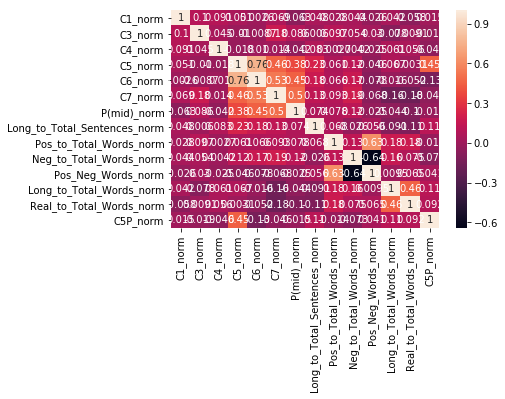

In [63]:
# evaluates ranked variables or ordinal
# used if we have not normalized first
# Add Corr with functions
spearman =normalized_df.corr(method ='spearman')
sns.heatmap(spearman, annot=True)

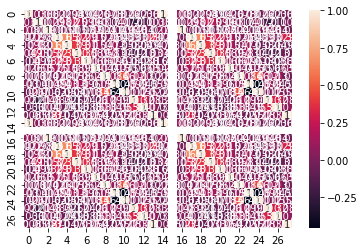

In [64]:
# evaluates ranked variables or ordinal
# used if we have not normalized first
# prefered in small samples or if there are outliers
# more accurate than spearman
kendall = norm_df.corr(method ='kendall')
sns.heatmap(kendall, annot=True)

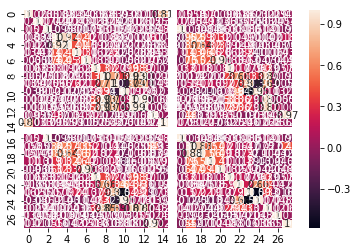

In [65]:
# used to evaluate continuous variables
# is prefered for our dataset
# need to normalize before we calcualte
pearson = norm_df.corr(method ='pearson')
sns.heatmap(pearson, annot=True)

# Outlier Detection from TAO
 ### to be adjsuted

In [66]:
# getting the upper boundary using 3 standard deviation
# you should also get the lower boundary
# You can also set the boundaries using IQR
u_bound = normalized_df.mean() + 3* normalized_df.std()
print(u_bound)

C1_norm                         1.009377
C3_norm                         1.006081
C4_norm                         0.103944
C5_norm                         1.029082
C6_norm                         1.026781
C7_norm                         1.014452
P(mid)_norm                     1.005060
Long_to_Total_Sentences_norm    0.839556
Pos_to_Total_Words_norm         0.993687
Neg_to_Total_Words_norm         0.994414
Pos_Neg_Words_norm              1.001044
Long_to_Total_Words_norm        0.996246
Real_to_Total_Words_norm        0.999945
C5P_norm                        1.003889
dtype: float64


In [67]:
# detecting any values are greater than the upper boundary
norm_df[norm_df>u_bound].count()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
dtype: int64

In [68]:
# going for all the columns
for col in normalized_df.columns:
    u_bound = normalized_df[col].mean() + 3* normalized_df[col].std()
    normalized_df[col][normalized_df[col] > u_bound] = u_bound

In [69]:
# detecting any values are greater than the upper boundary
normalized_df[norm_df>u_bound].count()

C1_norm                         0
C3_norm                         0
C4_norm                         0
C5_norm                         0
C6_norm                         0
C7_norm                         0
P(mid)_norm                     0
Long_to_Total_Sentences_norm    0
Pos_to_Total_Words_norm         0
Neg_to_Total_Words_norm         0
Pos_Neg_Words_norm              0
Long_to_Total_Words_norm        0
Real_to_Total_Words_norm        0
C5P_norm                        0
dtype: int64

In [70]:
# Replace the values greater than the upper boundary with the upper boundary
normalized_df[normalized_df>u_bound] = u_bound

# Binning Code from Tao

In [71]:
#Creating Bins for ploting and understanding of the target 

## Binning for Cintinuous and categorical 

def assign_win_bins(W):
    if W < 50:                    # Creating a bin value of 1 for wins amounting less than 50
        return(1)
    if W >= 50 and W <= 69:       # Creating a bin value of 2 for wins amounting less than 70 and greater than 50 
        return(2)
    if W >= 70 and W <= 89:       # Creating a bin value of 3 for wins amounting less than 90 and greater than 70
        return(3)
    if W >= 90 and W <= 109:      # Creating a bin value of 4 for wins amounting less than 110 and greater than 90
        return(4)
    if W >= 110:                  # Creating a bin value of 5 for wins amounting greater than 110
        return(5)
   
df['Win_bins'] = df['W'].apply(assign_win_bins)  # Creating a new column Win_bins in the dataframe

df.head()

KeyError: 'W'

# Feature Selection to reduce the columns
    * Split SIC Code to possibly use for feature engeneering near the end
  *  https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f

In [ ]:
#df_copy['I3'].str.split(n=4)
#You loaded the data in a DataFrame object called dataframe now.

#Let's convert the DataFrame object to a NumPy array to achieve faster computation. 
#Also, let's segregate the data into separate variables so that the features and the labels are separated.

#array = dataframe.values
#X = array[:,0:8] #features
#Y = array[:,8] #target

In [ ]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

# Export to CSV to be evaluated

In [ ]:
#from openpyxl.workbook import Workbook
df_impute_copy.to_csv("output.csv")

In [ ]:
#col_list_inverse = df_impute_copy.iloc[:,[0,1,2,3,8,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72]].columns.tolist()
#col_list_sqrt
#col_list_log
#col_list_inverse

# TEH END (All code below is the sandbox)

In [ ]:
#df_copy['I3'].str.split(n=4)

In [ ]:
#use histogram to visualize the # of observations for IPO prices
df_impute_copy['P(IPO)'].hist (bins=20)
#use histogram to visualize the # of observations for IPO 1Day prices
df_impute_copy['P(1Day)'].hist (bins=20)

In [ ]:
#for feature in col_list: 
 #   print(plt.pyplot.hist(df_copy[feature], bins=10,range=[0,40]))


In [ ]:
#plt.pyplot.hist(df_copy[col_list], bins=10, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, data=None)

In [ ]:
#To filter out only continuous columns
#float_cols = col_list
#replacement = df_copy.loc[:,float_cols]
#print(replacement)

In [ ]:
#sm.qqplot(df_copy['C7'])

In [ ]:
#box_plot = plt.figure(figsize=(4,3))
#ax1 = box_plot.add_subplot(1,1,1)
#ax1.boxplot(
    # first argument is the data
    # since we are plotting over two pieces of data
    # we have to put each piece of data into a list
    #[tips[tips.sex == 'Female']['tip'],
     #tips[tips.sex == 'Male']['tip']],
    # we can pass in optional parameter to label the data
    #labels = ['Female', 'Male'])
#ax1.set_xlabel('Sex')
#ax1.set_ylabel('Tip')
#ax1.set_title('Tips by Sex in boxplot')
#box_plot.show()

In [ ]:
# Create the random variables with mean 5, and sd 3
#x_10 = stats.norm.rvs(loc=5, scale=3, size=10)
#x_50 = stats.norm.rvs(loc=5, scale=3, size=50)
#x_100 = stats.norm.rvs(loc=5, scale=3, size=100)
#x_1000 = stats.norm.rvs(loc=5, scale=3, size=1000)# Print the p values
#print (stats.shapiro(p_df))
#print stats.shapiro(x_50)
#print stats.shapiro(x_100)
#print stats.shapiro(x_1000)
# Skew will be easier to determine the normalization df.skew()

In [ ]:
#if norm_df[feature].skew()>0.5:
 #       norm_df[norm_name] = np.cbrt(norm_df[feature]
  #  elif norm_df[feature].skew()<-0.5:
   #     norm_df[norm_name] = np.power(norm_df[feature],2)
    #else: norm_df[norm_name] = norm_df[feature]

In [ ]:
#for feature in norm_sublist:
 #   norm_name = (feature + "_norm")
  #  if norm_df[feature].skew() >0.5:
   #     norm_df[norm_name] = np.cbrt(norm_df[feature])
    #elif norm_df[feature].skew() < -0.5:
   #                             norm_df[norm_name] = np.power(norm_df[feature],2)
   # else: norm_df[norm_name] = norm_df[feature]
#norm_df 
#for feature in norm_sublist:  
 #   if norm_df[feature].skew() > 0.5:
  #      norm_df[feature] = np.cbrt(norm_df[feature]
   # elif norm_df[feature].skew() < -0.5:
    #    norm_df[feature] = np.power(norm_df[feature],2)
    #else: norm_df[feature] = norm_df[feature]

In [ ]:
#for feature in eval_list:
 #   print(df_eval_base[feature])

In [ ]:
# import required packages for splitting data
#from sklearn import model_selection
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split

# import required packages for evaluating models
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#rom sklearn.metrics import roc_auc_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
#from sklearn.linear_model import LogisticRegression

In [ ]:
# # Create new normalized columns
# norm_list =[]
# for col in eval_list:
#     norm_name = col + "_norm"
#     norm_list.append(norm_name) 
# norm_list

In [ ]:
# # creating the titles for the log columns and normalizing those columns by taking the log of the original columns
# log_col_list =[]
# for col in col_list:
#     col="log_"+col
#     log_col_list.append(col)
# log_col_list
# df_impute_copy[log_col_list] = np.log(df_impute_copy[col_list])
# df_impute_copy.info()

In [ ]:
# # creating the titles for the log columns and normalizing those columns by taking the sqrt of the original columns
# sqrt_col_list =[]
# for col in col_list:
#     col="sqrt_"+col
#     sqrt_col_list.append(col)
# log_col_list
# df_impute_copy[sqrt_col_list] = np.sqrt(df_impute_copy[col_list])
# df_impute_copy.info()

In [ ]:
# # creating the titles for the log columns and normalizing those columns by taking the inverse of the original columns
# inverse_col_list =[]
# for col in col_list:
#     col="inverse_"+col
#     inverse_col_list.append(col)
# log_col_list
# df_impute_copy[inverse_col_list] = 1/(df_impute_copy[col_list])
# df_impute_copy.info()

# THE WAY FORWARD TO THE LIGHT

Prework: Handle missing data, dashes, inconsistant data, 
    
    1. Selected Imputation methods by column
       - Get code from Dawn
       - mean, median, mode
    2. Normalize
       - Code from Brian
           - Sqrt
           - Log
           - 1/X
       - Impute again for inf errors
    3. Add calculated fields (Mike to provide code)
       - Y1
       - Y2
       - C3'
       - C5'
       - C6'
    4. Correlation + Heat map from Mike
       - Pearson
       - Kendall
       - Spearman
    5. Reduce to selected independent variables
       - Use Correlation methods to eliminate Fields
       - Use Feature Importance to determine which ones to keep
       - Feature Engeneering of P/Sales ratio
       - make some fields bianary
    6. Run evaluation code

# Calculated Fields (Where we stopped)

In [ ]:
# #Create variable true_value for C6P
# # Add T1 T4/T1 S1 = S1/S2 Calcualte all the ratios for the Ts & S Colums
# true_value = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100

# #Create new columns
# #Add them to df_alternate_copy
# #Create P(mid) variable
# df_alt_copy['P(mid)'] = (df_alt_copy['P(H)'] + df_alt_copy['P(L)']) / 2
# df_alt_copy['C3P'] = np.where(df_alt_copy['C3'] > 0, '1', '0')
# df_alt_copy['C5P'] = df_alt_copy['C5'] / df_alt_copy['C6']
# df_alt_copy['C6P'] = np.where(df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)'], true_value, '0')
# df_alt_copy['Y1'] = np.where(df_alt_copy['P(IPO)'] < df_alt_copy['P(mid)'], '1', '0')
# df_alt_copy['Y2'] = np.where(df_alt_copy['P(IPO)'] < df_alt_copy['P(1Day)'], '1', '0')




# #if df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)']:
#     #df_alt_copy['C6P'] = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100 
# #else :
#     #df_alt_copy['C6P'] = 0

# df_alt_copy.head()